Index(['Date_and_time_of_unloading', 'Product_code', 'Amount', 'Sale_amount',
       'Discount_amount', 'Profit', 'Percentage_markup',
       'Discount_percentage'],
      dtype='object')


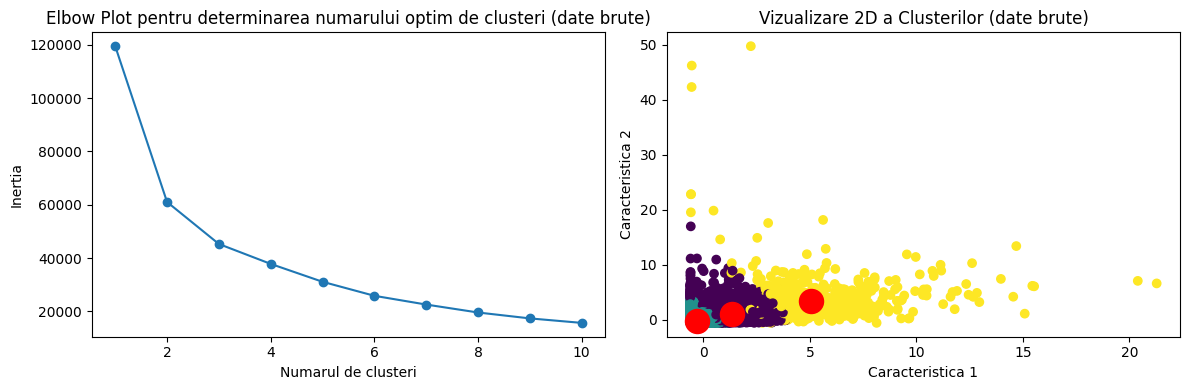

       Discount_amount   Profit  Percentage_markup  Discount_percentage  \
40006           247.86    22.14               9.63                49.57   
46978           148.00    42.00              23.33                40.00   
46184           170.00    30.00              13.64                40.48   
42624            35.00   365.00             121.67                 5.00   
44399            90.49   125.51              53.64                20.11   
46220            90.56   389.44              92.72                10.06   
32252           715.21  3825.79             145.52                 9.98   
21726            88.79   181.21              78.79                17.76   
44006            90.00   313.20              68.56                10.47   
45760            80.00    35.62              42.21                40.00   
17074            60.00   477.06             107.70                 6.12   
19946          2446.73 -1196.26             -98.09                99.06   
34854           150.81   

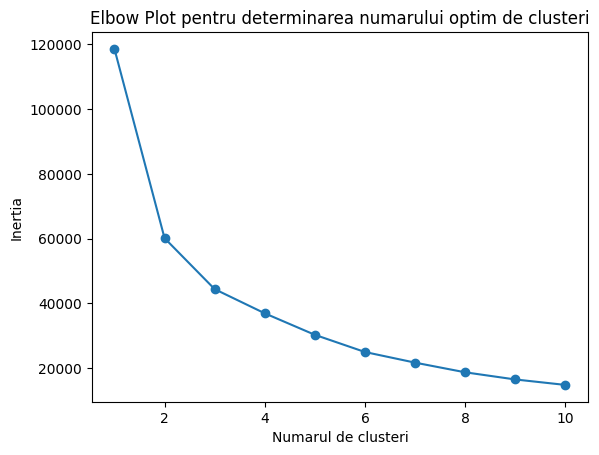

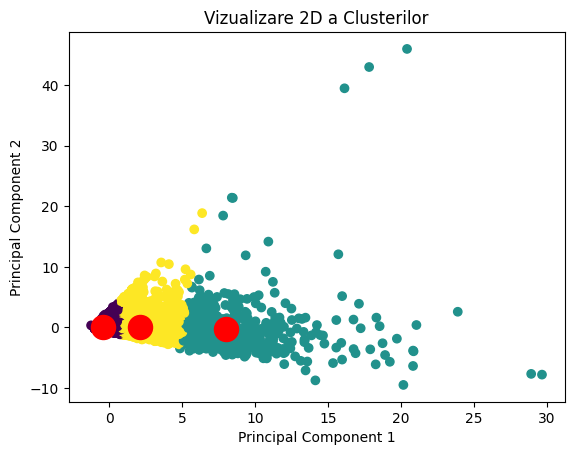

       Discount_amount   Profit  Percentage_markup  Discount_percentage  \
22691           198.24   495.76              60.02                13.04   
47915          1234.05  1300.95              54.09                24.98   
40513            35.00   508.00              65.38                 2.65   
39931            36.28   363.72             121.24                 5.18   
24715           139.15   652.10              71.76                 8.19   
24627           326.94   591.06              54.63                16.35   
12814           100.52   133.98              50.46                20.10   
23558            40.00   296.00              71.50                 5.33   
30233           195.00   907.84              64.06                 7.74   
1953             32.43   187.38              72.02                 6.76   
24296           460.33  1758.67              65.60                 9.39   
22515           640.00   394.50              69.76                40.00   
39171            87.39   

In [ ]:
# Importul bibliotecilor necesare
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Citeste fisierul CSV
product_range = pd.read_csv('Transactions.csv')

# Verifica numele exacte ale coloanelor din fisierul CSV
print(product_range.columns)

# Selecteaza caracteristicile relevante
features = ['Sale_amount', 'Discount_amount', 'Profit']

# Elimina randurile cu valori lipsa
product_range = product_range.dropna(subset=features)

# Standardizare
scaler = StandardScaler()
scaled_data = scaler.fit_transform(product_range[features])

# Elbow plot pentru datele brute
inertia_raw = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init=10)  # Specifica explicit n_init, aveam warning inainte
    kmeans.fit(scaled_data)
    inertia_raw.append(kmeans.inertia_)

# Vizualizare Elbow Plot pentru datele brute
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(range(1, 11), inertia_raw, marker='o')
plt.title('Elbow Plot pentru determinarea numarului optim de clusteri (date brute)')
plt.xlabel('Numarul de clusteri')
plt.ylabel('Inertia')

# K-Means clustering pe datele brute
kmeans_raw = KMeans(n_clusters=3, n_init=10)
kmeans_raw.fit(scaled_data)

# Adaugare coloana pentru clusteri in dataframe
product_range['Cluster'] = kmeans_raw.labels_

# Vizualizare 2D a clusterilor
plt.subplot(1, 2, 2)
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=kmeans_raw.labels_, cmap='viridis', marker='o')
plt.scatter(kmeans_raw.cluster_centers_[:, 0], kmeans_raw.cluster_centers_[:, 1], s=300, c='red')
plt.title('Vizualizare 2D a Clusterilor (date brute)')
plt.xlabel('Caracteristica 1')
plt.ylabel('Caracteristica 2')
plt.tight_layout()
plt.show()

# Afiseaza mai multe randuri ale setului de date cu coloana Cluster adaugata
print(product_range[['Discount_amount', 'Profit', 'Percentage_markup', 'Discount_percentage', 'Cluster']].sample(20))

# Reducerea dimensionalitatii cu PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

# Elbow plot
inertia = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init=10)
    kmeans.fit(reduced_data)
    inertia.append(kmeans.inertia_)

# Vizualizare Elbow Plot
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Plot pentru determinarea numarului optim de clusteri')
plt.xlabel('Numarul de clusteri')
plt.ylabel('Inertia')
plt.show()

# K-Means clustering pe datele reduse dimensional
kmeans = KMeans(n_clusters=3, n_init=10)
kmeans.fit(reduced_data)

# Adauga coloana pentru clusteri în dataframe
product_range['Cluster'] = kmeans.labels_

# Vizualizare 2D a clusterilor
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans.labels_, cmap='viridis', marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.title('Vizualizare 2D a Clusterilor')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Afiseaza mai multe randuri ale setului de date cu coloana Cluster adaugata
print(product_range[['Discount_amount', 'Profit', 'Percentage_markup', 'Discount_percentage', 'Cluster']].sample(20))

